In [19]:
import numpy as np
import matplotlib.pyplot as mp
import xarray as xr
import datetime as dt
import cartopy.crs as ccrs
import pandas as pd


<hr>
Initial Simulations Information
<hr>

In [42]:
#case_desc = np.array(['C6','C5','rC5now','rUW','rUWp','rMG1','rC5p','rC5pm','rZMc','rZMp','rpfrac','rCE2i']) ; pref_out = 'revert'
#case_desc = np.array(['C6','C5','CE2','CE1']) ; pref_out = 'ditcz'
                      
#case_desc = np.array(['C6','C5','C4','CE2','CE1','CC4','CE2sst']) ; pref_out = 'release'
#case_desc = np.array(['C6','C5','W110']) ; pref_out = 'waccm_hvr'
#case_desc = np.array(['C6','C5','C4']) ; pref_out = 'cam456'
#case_desc = np.array(['C6','CE2','CE2sst','CE2sstd','REYsstd']) ; pref_out = 'day_mon_Rey_sst_'   

#case_desc = np.array(['C6','rC5']) ; pref_out = 'test_'   



case_desc = np.array(['C6','L48','L48.BL10','L48.BL10.zm1','L48.BL10.zm2']) ; pref_out = 'L48+BL10_test'

#month_ave = np.array(["Jun","Jul","Aug"]) 
month_ave = np.array(["Dec","Jan","Feb"])



#reg_a = [-10,10,120.,160] # lats, lons averaging region - m. Continent
reg_a = [-5,5,120.,160] # lats, lons averaging region - m. Continent
#reg_a = [10,25,70,130] # lats, lons averaging region - Monsoon reg.

#reg_a = [7.5,10,220.,240] # lats, lons averaging region. - E. Pac 1
#reg_a = [2.5,7.5,240.,270.]  # Center of ITCZ in AMIP  

#reg_a = [-7.5,-2.5,240.,270.]  # Southern spurious ITCZ region. 
#reg_a = [5,12,270,280] # lats, lons averaging region. - E. Pac 2
#reg_a = [5,12,240,270] # lats, lons averaging region. - E. Pac 2



var_names = ['OMEGA','DIV'] ; vscales = [1.,1] ; f1xmin=-0.14; f1xmax=0.02 ;f1dx = 0.02 ; f2xmin=-0.0002; f2xmax=0.0006 ;f2dx = 0.0002  ; f1name = '[Vertical Velocity [pa/s]]' ; f2name = '[Convergence [/s]]'
ovar_scale =  100./86400.  # mb/day -> pa/s

#var_names = ['DCQ','DTCOND'] ; vscales = [86400*1000,86400.] ; f1xmin=-2.; f1xmax=2. ;f1dx = 0.5 ; f2xmin=-2.; f2xmax=2. ;f2dx = 1.  ; f1name = '[Physics Moistening [g/kg/day]]' ; f2name = '[Physics Heating [K/day]]'


#var_names = ['DCQ','DTCOND'] ; vscales = [86400*1000,86400.] ; f1xmin=-5.; f1xmax=5. ;f1dx = 1. ; f2xmin=-8.; f2xmax=8. ;f2dx = 2.  ; f1name = '[Deep Convection Moistening [g/kg/day]]' ; f2name = '[Deep Convection Heating [K/day]]'
lobs = True

p_levs = np.arange(100.,1050.,50.)


###### DERIVED ######

dir_root = '/glade/p/cgd/amp/people/hannay/amwg/climo/'
dir_obs = '/glade/p/cesm/amwg/amwg_data/obs_data/'
dir_proot = '/glade/u/home/rneale/python/'

#sim_names = cam_revert_list()
sim_names = cam_vres_list()

reg_a_join = ' '.join(str(reg_a))

reg_a_str = '%d-%d\u00b0W %.1f-%.1f\u00b0N' % (360-reg_a[2],360-reg_a[3],reg_a[0],reg_a[1])
reg_a_out = '%d-%dW_%.1f-%dN' % (360-reg_a[2],360-reg_a[3],reg_a[0],reg_a[1])
if reg_a[0] < 0. : reg_a_str = '%d-%d\u00b0W %.1f-%.1f\u00b0S' % (360-reg_a[2],360-reg_a[3],reg_a[0],reg_a[1])

<hr>
Main Code
<hr>

-Averaging for months -  ['Dec' 'Jan' 'Feb']
-Averaging for region -  240-200°W -5.0-5.0°S


- Case #  [1]  of  5
- Name =  C6  -> f.e20.FHIST.f09_f09.cesm2_1.001
['/glade/p/cgd/amp/people/hannay/amwg/climo/f.e20.FHIST.f09_f09.cesm2_1.001/0.9x1.25/f.e20.FHIST.f09_f09.cesm2_1.001_12_climo.nc', '/glade/p/cgd/amp/people/hannay/amwg/climo/f.e20.FHIST.f09_f09.cesm2_1.001/0.9x1.25/f.e20.FHIST.f09_f09.cesm2_1.001_01_climo.nc', '/glade/p/cgd/amp/people/hannay/amwg/climo/f.e20.FHIST.f09_f09.cesm2_1.001/0.9x1.25/f.e20.FHIST.f09_f09.cesm2_1.001_02_climo.nc']
<xarray.DataArray 'OMEGA' (lev: 32)>
dask.array<mul, shape=(32,), dtype=float32, chunksize=(32,), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6

- Case #  [2]  of  5
- Name =  L48  -> f.e21.FWscHIST.ne30_L48_tag20201111.001
['/glade/p/cgd/amp/people/hannay/amwg/climo/f.e21.FWscHIST.ne30_L48_tag20201111.001/0.9x1.25/f.e21.FWscHIST.ne30_L48_tag20201111.001_12_climo.nc', '/gl

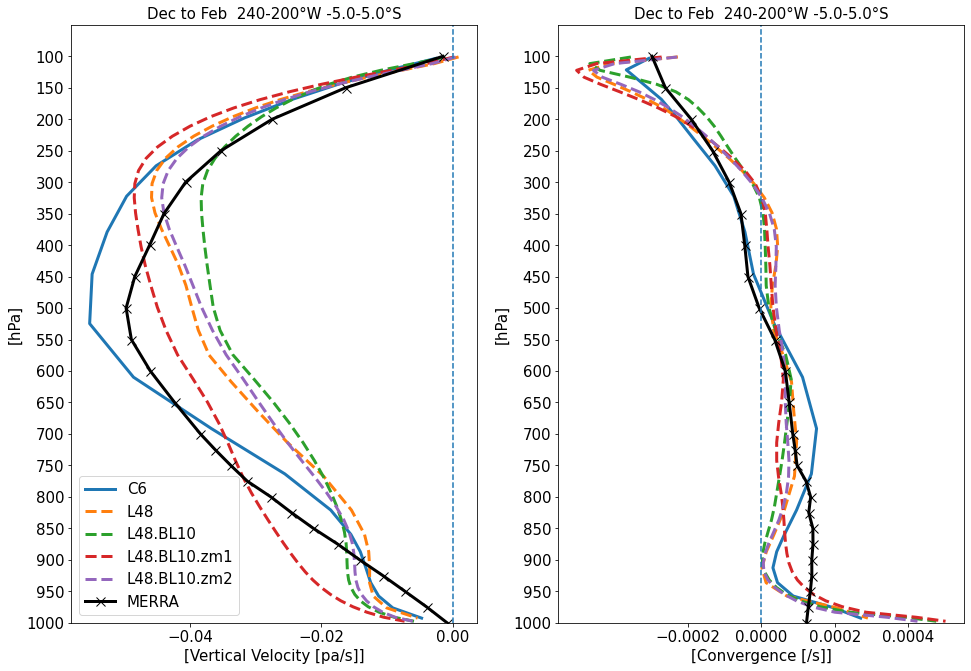

In [43]:
## LOOP ##
fig, ax = mp.subplots(1,2,figsize=(16, 11))

nmnths = month_ave.size
ncases = case_desc.size


print('-Averaging for months - ',month_ave)
print('-Averaging for region - ',reg_a_str)
print('')

icase = 0
for ir in case_desc:
        mon_list = []
        case = case_desc[icase]
        sim_name = sim_names.loc[case]['run name']
        
        print('')
        print('- Case # ',[icase+1],' of ',ncases)
        print('- Name = ',case,' ->',sim_name)
        
        mnums = []
        for im in range(0,nmnths): mnums.append(dt.datetime.strptime(month_ave[im], "%b").month) # grab month numbers

        mon_aves = [ "{:02}".format(x) for x in mnums ] # In correct format
        mon_list = ','.join(mon_aves)
        
# Read files in 
        pre_dir = 'yrs_1979-2005' if case=='CE2' else '0.9x1.25'
        files_in = [dir_root+sim_name+'/'+pre_dir+'/'+sim_name+'_'+mon_aves[ff]+'_climo.nc' for ff in range(nmnths)]
        files_ptr = xr.open_mfdataset(files_in)
        print(files_in)
        
# Grab variables for a region (reg_a).
        var_in1 = files_ptr[var_names[0]].loc[:,:,reg_a[0]:reg_a[1],reg_a[2]:reg_a[3]] 
        var_plot1 = vscales[0]*var_in1.mean(dim=['time','lat','lon'])
        
        if var_names[1] != 'DIV':
            var_in2 = files_ptr[var_names[1]].loc[:,:,reg_a[0]:reg_a[1],reg_a[2]:reg_a[3]] 
            var_plot2 = vscales[1]*var_in2.mean(dim=['time','lat','lon'])
        else:
            print(var_plot1)
            var_plot2 = var_plot1.differentiate("lev")

        ps_in = files_ptr['PS'].loc[:,reg_a[0]:reg_a[1],reg_a[2]:reg_a[3]] 
        hyam = files_ptr['hyam'] ; hybm = files_ptr['hybm'] ; P0 = 1000. ; lev = files_ptr['lev']

# Levs
        ilevs = np.where(lev >= min(p_levs))
        ilevs = ilevs[0]
        dp_lev = np.diff(lev)
    
   
# Plots
        if case in ['C4','C5','C6','W110','W121']:
            ax[0].plot(var_plot1[ilevs],lev[ilevs],lw=3,markersize=9)   
            ax[1].plot(var_plot2[ilevs],lev[ilevs],lw=3,markersize=9)   
#            ax[1].plot(var_plot2[ilevs[0:-1]],lev[ilevs[0:-1]],lw=3,markersize=9,marker='x')   
        else:
            ax[0].plot(var_plot1[ilevs],lev[ilevs],lw=3,linestyle='--') 
            ax[1].plot(var_plot2[ilevs],lev[ilevs],lw=3,linestyle='--') 
#            ax[1].plot(var_plot2[ilevs[0:-2]],lev[ilevs[0:-2]],lw=1.5,linestyle='--')  
        # End loop here
        icase=icase+1


leg_cases = case_desc
mp.rcParams['xtick.labelsize']=15 # GLobal set of xtick label size    




for ifig in [0,1]:
    ax[ifig].invert_yaxis()    
    ax[ifig].set_title(month_ave[0]+' to '+month_ave[nmnths-1]+'  '+reg_a_str,fontsize=15)
    ax[ifig].set_ylabel('[hPa]',fontsize=15) 
    ax[ifig].set_yticks(p_levs)

    ax[ifig].set_yticklabels(p_levs.astype(int),fontsize=15)
    ax[ifig].set_ylim([1000.,50.])
#    ax[ifig].set_yscale("log")
    
    if ifig==0:
        ax[ifig].set_xlabel(f1name,fontsize=15)            
        xlabs = np.arange(f1xmin,f1xmax+f1dx,f1dx)
#        ax[ifig].set_xticks(xlabs)
#        ax[ifig].set_xlim([f1xmin,f1xmax])
    else :
        ax[ifig].set_xlabel(f2name,fontsize=15)     
        xlabs = np.arange(f2xmin,f2xmax+f2dx,f2dx)
#        ax[ifig].set_xticks(xlabs)
 #       ax[ifig].set_xlim([f2xmin,f2xmax])
        

    ax[ifig].set_xticks(xlabs)
#    ax[ifig].set_xticklabels(xlabs,fontsize=15)  

   
#    ax[ifig].grid(linestyle='--')  
    
    ax[0].legend(leg_cases,fontsize=15)

# Observations (not for model tendencies)
if lobs: 
    obs_name = 'MERRA'
    ofiles_in = [dir_obs+obs_name+'_'+mon_aves[ff]+'_climo.nc' for ff in range(nmnths)]
    print(ofiles_in)
    ofiles_ptr = xr.open_mfdataset(ofiles_in,parallel=True)
  
    ovar_in = ofiles_ptr[var_names[0]].loc[:,:,reg_a[0]:reg_a[1],reg_a[2]:reg_a[3]] 
    print(ovar_in)
    olevs = ofiles_ptr['lev']

    ilevs = np.where(olevs >= min(p_levs))
    ilevs = ilevs[0]
    
    ovar_plotw = ovar_in.mean(dim=['time','lat','lon'])
    ovar_plotw = ovar_scale*ovar_plotw # Scaling 
    ovar_plotd = ovar_plotw.differentiate("lev")  

#    ovar_plotd = -np.gradient(ovar_plotw[::-1])
    ax[0].plot(ovar_plotw[ilevs],olevs[ilevs],lw=3,markersize=9,marker='x',color = 'black')  
    
    leg_cases = np.append(case_desc,'MERRA')  
    ax[1].plot(ovar_plotd[ilevs],olevs[ilevs],lw=3,markersize=9,marker='x',color = 'black')  
       
ax[0].legend(leg_cases,fontsize=15)

ax[0].axvline(0.,linestyle='--')
ax[1].axvline(0.,linestyle='--')  
mp.savefig(dir_proot+'python-figs/vert_proc/'+pref_out+'_vprof_'+var_names[0]+'_'+var_names[1]+'_'+reg_a_out+'_'+month_ave[0]+'_to_'+month_ave[nmnths-1]+'.png', dpi=150)

In [36]:
#####################################
# CAM6 Revert Experiments + others   
#####################################


def cam_revert_list():
	

    rl = {} # Revert List
# Releases
    rl['C4']   =  ['f40.1979_amip.track1.1deg.001']
    rl['C5']   =  ['30L_cam5301_FAMIP.001']
    rl['C6']   =  ['f.e20.FHIST.f09_f09.cesm2_1.001']
    rl['CC4']  =  ['b40.20th.track1.1deg.012']
    rl['CE1']  =  ['b.e11.B20TRC5CNBDRD.f09_g16.001']
    rl['CE2']  =  ['b.e21.BHIST.f09_g17.CMIP6-historical.001']

    # Reverts
    rl['rC5now']  =   ['f.e20.FHIST.f09_f09.cesm2_1_cam5.001']
    rl['rC5']     =   ['f.e20.FHIST.f09_f09.cesm2_1_true-cam5.001']
    rl['rC5t']    =   ['f.e20.FHIST.f09_f09.cesm2_1_true-cam5_param_topo.001']
    rl['rUWold']  =   ['f.e20.FHIST.f09_f09.cesm2_1_uw.001']
    rl['rGW']    =   ['f.e20.FHIST.f09_f09.cesm2_1_iogw.001']
    rl['rZMc']  =   ['f.e20.FHIST.f09_f09.cesm2_1_capeten.001']
    rl['rMG1']  =   ['f.e20.FHIST.f09_f09.cesm2_1_mg1.001']
    rl['rSB']  =   ['f.e20.FHIST.f09_f09.cesm2_1_sb.002']
    rl['rTMS']  =   ['f.e20.FHIST.f09_f09.cesm2_1_tms.001']
    rl['rCE2i']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revert125.001']
    rl['rC5p']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revertcam5param.001']
    rl['rC5pm']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revertcam5param.002']
    rl['rZMp']  =   ['f.e20.FHIST.f09_f09.cesm2_1_cam5_zmconv.001']
    rl['rM3']  =   ['f.e20.FHIST.f09_f09.cesm2_1_mam3.001']
    rl['rUW']  =   ['f.e20.FHIST.f09_f09.cesm2_1_uw.002']
    rl['rUWp']  =   ['f.e20.FHIST.f09_f09.cesm2_1_uw.003']
    rl['rMG1ii']  =   ['f.e20.FHIST.f09_f09.cesm2_1_mg1.002']
    rl['rice']  =   ['f.e20.FHIST.f09_f09.cesm2_1_ice-micro.001']
    rl['rpfrac']  =   ['f.e20.FHIST.f09_f09.cesm2_1_precip_frac_method.001']
    rl['rpremit']  =   ['f.e20.FHIST.f09_f09.cesm2_1_cld_premit.001']
    rl['rC5psalt']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revertc5seasalt.001']
    rl['rC5pdust']  =   ['f.e20.FHIST.f09_f09.cesm2_1_revertc5dust.001']
    rl['rL30']  =   ['f.e20.FHIST.f09_f09.cesm2_1_L30.001']
    
# SST configs    
    rl['CE2sst']  =   ['f.e20.FHIST.f09_f09.cesm2_1_coupled-sst-amip.001']
    rl['CE2sstd']  =   ['f.e20.FHIST.f09_f09.cesm2_1_coupled-sst-amip_daily.001']
    rl['REYsstd']  =   ['f.e20.FHIST.f09_f09.cesm2_1_reynolds_daily_sst.006']

    
# High vertical resolution.
    rl['W110']  =   ['f.e21.FWscHIST_BCG.f09_f09_mg17_110L.001']
    rl['W121']  =   ['f.e21.FWscHIST_BCG.f09_f09_mg17_121L_DZ_400m_80kmTop.001']

# Data frame
    rl_df = pd.DataFrame.from_dict(rl, orient='index',columns=['run name'])
    return rl_df


In [37]:

def cam_vres_list():
	

    rl = {} # Revert List
# BL Vres
    rl['C5']   =  ['30L_cam5301_FAMIP.001']
    rl['C6']   =  ['f.e20.FHIST.f09_f09.cesm2_1.001']
    rl['L48']       =  ['f.e21.FWscHIST_BGC.ne30_ne30_mg17_L48_revert-J.001']
    rl['L48cin5']   =  ['f.e21.FWscHIST_BGC.ne30_ne30_mg17_L48_revert-J_num_cin-5.001']
    rl['L110'] = ['f.e21.FWscHIST_BCG.f09_f09_mg17_110L.001']
    rl['L48']=['f.e21.FWscHIST.ne30_L48_tag20201111.001']
    rl['L48.BL10']=['f.e21.FWscHIST.ne30_L48_BL10_v3_tag20201111.001']
    rl['L48.BL10.zm1']=['f.e21.FWscHIST.ne30_L48_BL10_v3_tag20201111_zm1.001']
    rl['L48.BL10.zm2']=['f.e21.FWscHIST.ne30_L48_BL10_v3_tag20201111_zm2.001']
    

# Data frame
    rl_df = pd.DataFrame.from_dict(rl, orient='index',columns=['run name'])
    return rl_df